In [2]:
import os, sys
# for accessing src, stan, etc.
sys.path.append(os.path.abspath(os.path.join("../..")))

import bayesflow as bf
import numpy as np
import pickle
from src.AmortizedMixture import *
from src.models.NormalMixture import *

/Users/simonkucharsky/projects/bayesflow/amortized-mixture/.venv/lib/python3.11/site-packages/bayesflow/trainers.py:27: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [3]:
model = NormalMixture(n_cls=2, n_obs=[30, 220], n_rep=[1,10], separation=3.0)

In [4]:
trainer = bf.trainers.Trainer(
    amortizer=AmortizedMixture(
        inference_net=IndependentClassificator(num_outputs=model.n_cls, num_dense=8, dropout=False),
        local_summary_net  = bf.networks.DeepSet(summary_dim=1),
        global_summary_net = bf.networks.SetTransformer(input_dim=1, summary_dim=model.n_par*2)
        ), 
    generative_model=model, 
    configurator=lambda x: x, checkpoint_path="checkpoints/mixture")

INFO:root:Initialized empty loss history.
INFO:root:Initialized networks from scratch.
INFO:root:Performing a consistency check with provided components...
INFO:root:Done.


In [5]:
%%time
h = trainer.train_online(epochs=100, iterations_per_epoch=1000, batch_size=32)

Training epoch 100: 100%|██████████| 1000/1000 [01:55<00:00,  8.64it/s, Epoch: 100, Iter: 1000,Loss: 3.050,Avg.Loss: 4.695,LR: 0.00E+00]


CPU times: user 7h 24min 53s, sys: 2h 54min 25s, total: 10h 19min 18s
Wall time: 3h 38min 46s


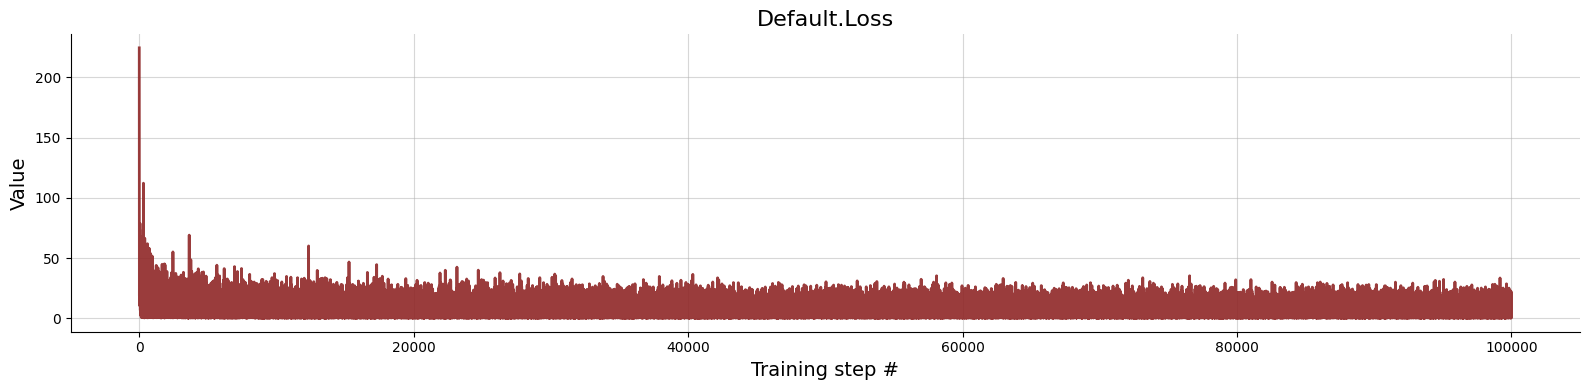

In [6]:
f=bf.diagnostics.plot_losses(h)